# Projeto de Extração de Dados a partir das API's do IPEA e IBGE

## Objetivo
Realização de um ETL - Extract, Transform, Load. que consiste em:
  * Extract: Reunir os dados das API's.
  * Transform: Fazer as conversões e limpeza.
  * Load: Salvar os Dados consolidados em um banco de dados, ou warehouse para que possam ser consultados e analisados.

### Alvo:
Catalogar a série histórica de feminicídios no Brasil.

Fontes: 
* [IPEA - Instituto de Pesquisa Econômica Aplicada](http://www.ipeadata.gov.br)
* [IBGE - Instituto Brasileiro de Geografia e Estatística](https://www.ibge.gov.br/)

## Sobre as API's
### IPEA
O site do IPEA disponibiliza uma biblioteca Python que ajuda nas requisições da API, e possui um repositório no [GitHub](https://github.com/luanborelli/ipeadatapy/) com sua documentação. É através dela que extraímos os dados sobre feminicídio.

### IBGE
O IBGE também disponibiliza uma [API](https://servicodados.ibge.gov.br/api/docs/localidades) para consultas de código de região onde utilizamos para melhor idêntificação dos territórios, já que a API do IPEA identifica apenas por código de território. 


## EXTRACT


In [0]:
#Instalação da biblioteca disponibilizada pelo site do IPEA.
!pip install ipeadatapy


You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-e9f9ba56-19a7-4936-9a0d-e26575a3f7c0/bin/python -m pip install --upgrade pip' command.


In [0]:
# Fazendo a requisição na API
import requests 

url = 'http://www.ipeadata.gov.br/api/odata4/'

response = requests.get(url)
response

Out[1]: <Response [200]>

In [0]:
# Verificando o retorno
response.json()

Out[2]: {'@odata.context': 'http://ipeadata.gov.br/api/odata4/$metadata',
 'value': [{'name': 'Paises', 'kind': 'EntitySet', 'url': 'Paises'},
  {'name': 'Metadados', 'kind': 'EntitySet', 'url': 'Metadados'},
  {'name': 'Temas', 'kind': 'EntitySet', 'url': 'Temas'},
  {'name': 'Territorios', 'kind': 'EntitySet', 'url': 'Territorios'},
  {'name': 'Valores', 'kind': 'EntitySet', 'url': 'Valores'},
  {'name': 'ValoresStr', 'kind': 'EntitySet', 'url': 'ValoresStr'}]}

### Utilizando o  Ipea Data

In [0]:
# Importando a biblioteca e listando as séries disponíveis
import ipeadatapy as ipea

series = ipea.list_series()
series

,CODE,NAME
0,ABATE_ABPEAV,Abate - aves - peso das carcaças
1,ABATE_ABQUBV,Abate - bovinos - quantidade
2,ABATE12_ABQUBO12,Abate - bois - quantidade
3,ABATE12_ABQUBV12,Abate - bovinos - quantidade
4,ABATE12_ABQUFR12,Abate - frangos - quantidade
...,...,...
3492,PNADCT_TXPARTCUF_SI,Taxa de participação - sem instrução ou equiva...
3493,PNAD_IAGRV,Domicílios com insegurança alimentar grave
3494,PNAD_IALEV,Domicílios com insegurança alimentar leve
3495,PNAD_IAMOD,Domicílios com insegurança alimentar moderada


### Fazendo a busca na série através do tema escolhido 

In [0]:
# 1359	HOMICF	Número de homicídios do sexo feminino

buscar = 'homicídio'
series[ series['NAME'].str.contains(buscar, case=False, na=False)]

,CODE,NAME
1358,HOMIC,Número de homicídios
1359,HOMICF,Número de homicídios do sexo feminino
1360,HOMICFJ,Número de homicídios de jovens de 15 a 29 anos...
1361,HOMICJ,Número de homicídios de jovens de 15 a 29 anos
1362,HOMICM,Número de homicídios do sexo masculino
1363,HOMICMJ,Número de homicídios de jovens de 15 a 29 anos...
1370,PHOMIC,Proporção de homicídios como causa de mortalidade
1371,PHOMICF,Proporção de homicídios como causa de mortalid...
1372,PHOMICFJ,Proporção de homicídios como causa de mortalid...
1373,PHOMICJ,Proporção de homicídios como causa de mortalid...


In [0]:
# construindo o dataframe com o método da biblioteca do ipea passando o códico da série.
# A biblioteca do IPEA importa o pandas junto a ela.

df = ipea.timeseries('HOMICF').reset_index()
df.head()

,DATE,CODE,RAW DATE,TERCODIGO,YEAR,NIVNOME,VALUE (Unidade)
0,1980-01-01,HOMICF,1980-01-01T00:00:00-02:00,15AMC1872_1997004,1980,AMC 1872-00,1.0
1,1980-01-01,HOMICF,1980-01-01T00:00:00-02:00,15AMC1872_1997008,1980,AMC 1872-00,1.0
2,1980-01-01,HOMICF,1980-01-01T00:00:00-02:00,21AMC1872_1997011,1980,AMC 1872-00,1.0
3,1980-01-01,HOMICF,1980-01-01T00:00:00-02:00,23AMC1872_1997002,1980,AMC 1872-00,1.0
4,1980-01-01,HOMICF,1980-01-01T00:00:00-02:00,23AMC1872_1997003,1980,AMC 1872-00,1.0


In [0]:
# Import da bibliotece json e fazendo as requisições HTTPs
import pandas as pd
import json
url_municipios = 'https://servicodados.ibge.gov.br/api/v1/localidades/distritos/'
url_estados = 'https://servicodados.ibge.gov.br/api/v1/localidades/estados/'
resp_municipio = requests.get(url_municipios)
resp_estados = requests.get(url_estados)

In [0]:
# Atribuindo a resposta a uma variável
data_municipio = resp_municipio.json()
data_estados = resp_estados.json()

# construindo os dataframes
ibge_municicio = pd.DataFrame(data_municipio)
ibge_estados = pd.DataFrame(data_estados)

### TRANSFORM

In [0]:
# Verificando Dados nulos
df.isnull().sum()

Out[109]: DATE               0
CODE               0
RAW DATE           0
TERCODIGO          0
YEAR               0
NIVNOME            0
VALUE (Unidade)    0
dtype: int64

In [0]:
# Verificando Dados NaN
df.isna().sum()

Out[111]: DATE               0
CODE               0
RAW DATE           0
TERCODIGO          0
YEAR               0
NIVNOME            0
VALUE (Unidade)    0
dtype: int64

In [0]:
# Excluindo as colunas que não serão utilizadas
df.keys() # ['DATE', 'CODE', 'RAW DATE', 'TERCODIGO', 'YEAR', 'NIVNOME','VALUE (Unidade)']
excluir = ['DATE', 'CODE', 'RAW DATE']
df.drop(columns=excluir, inplace=True)
df

,TERCODIGO,YEAR,NIVNOME,VALUE (Unidade)
0,15AMC1872_1997004,1980,AMC 1872-00,1.0
1,15AMC1872_1997008,1980,AMC 1872-00,1.0
2,21AMC1872_1997011,1980,AMC 1872-00,1.0
3,23AMC1872_1997002,1980,AMC 1872-00,1.0
4,23AMC1872_1997003,1980,AMC 1872-00,1.0
...,...,...,...,...
137857,1,2022,Regiões,476.0
137858,4,2022,Regiões,581.0
137859,3,2022,Regiões,990.0
137860,2,2022,Regiões,1373.0


In [0]:
# Uma Amostra Geral
df.sample(10)

,TERCODIGO,YEAR,NIVNOME,VALUE (Unidade)
55401,2616001,1995,Municípios,1.0
86548,52AMC6097039,2001,AMC 60-00,2.0
47688,35018,1993,Microrregiões,3.0
97180,4107702,2004,Municípios,1.0
32517,290060,1990,AMC 70-00,1.0
29542,2614600,1989,Municípios,1.0
128868,2500304,2019,Municípios,1.0
6378,260780,1982,AMC 70-00,1.0
85416,411710,2001,AMC 91-00,1.0
129211,3506102,2019,Municípios,1.0


### Renomeando as colunas

In [0]:
# Renomeando as colunas

colunas = ['id', 'Ano', 'Territorio', 'Quantidade_vitimas']
df.columns = colunas

In [0]:
df.sample(10)

,id,Ano,Territorio,Quantidade_vitimas
25555,150220,1988,AMC 70-00,1
89434,35AMC4097045,2002,AMC 40-00,1
5596,35AMC1872_1997024,1981,AMC 1872-00,51
27627,33AMC4097010,1988,AMC 40-00,5
73624,510650,1999,AMC 20-00,1
93930,50AMC7097006,2002,AMC 70-00,9
8059,35055,1982,Microrregiões,4
131509,4126504,2020,Municípios,1
128683,1501501,2019,Municípios,1
64180,314400,1997,AMC 60-00,1


### Convertendo a coluna quantidade para int

In [0]:
# Convertendo a coluna quantidade para int

df['Quantidade_vitimas'] = df['Quantidade_vitimas'].astype(int)

In [0]:
df.dtypes

Out[126]: Cod_ter               object
Ano                    int64
Territorio            object
Quantidade_vitimas     int64
dtype: object

### Integrar a tabela de cod de municipios do IBGE

In [0]:
# Excluindo a coluna não utilizada
ibge_municicio.drop(columns='municipio', inplace=True)

### Dataframe com os código de idêntificação dos municípios

In [0]:
ibge_municicio.sample(5)

,id,nome
1823,420330315,Fragosos
783,270040910,Sapucaia
8836,431810120,Toroquá
10089,355475505,Trabiju
6238,320370015,Menino Jesus


### Dataframe com os códigos de idêntificação dos Estados

In [0]:
ibge_estados.drop(columns='regiao', inplace=True)
ibge_estados.sample(5)

,id,sigla,nome
23,50,MS,Mato Grosso do Sul
7,21,MA,Maranhão
0,11,RO,Rondônia
19,35,SP,São Paulo
11,25,PB,Paraíba


### Dataframe de Feminicídios a nível Nacional

In [0]:
# Homicidios Nacional - Dataframe com o número de homicídios a nível Nacional.
df_brasil = df[df['Territorio'] == 'Brasil']
df_brasil.sample(10)

,id,Ano,Territorio,Quantidade_vitimas
98392,0,2004,Brasil,3806
68518,0,1997,Brasil,3585
104297,0,2007,Brasil,3817
102301,0,2006,Brasil,4042
2635,0,1980,Brasil,1349
96492,0,2003,Brasil,3910
130716,0,2019,Brasil,3707
53322,0,1994,Brasil,2835
35183,0,1990,Brasil,2577
135646,0,2021,Brasil,7352


### Dataframe de Feminicídios a nível Estadual

In [0]:
# Homicidios por Estado - Dataframe com o número de homicídios a nível Estadual.
df_estados = df[ df['Territorio'] == 'Estados'].reset_index()
df_estados

,index,id,Ano,Territorio,Quantidade_vitimas
0,1701,12,1980,Estados,2
1,1702,14,1980,Estados,2
2,2120,51,1980,Estados,4
3,2356,22,1980,Estados,7
4,2357,24,1980,Estados,7
...,...,...,...,...,...
1145,137851,33,2022,Estados,251
1146,137852,31,2022,Estados,272
1147,137853,23,2022,Estados,275
1148,137855,35,2022,Estados,368


In [0]:
# Aqui foi necessário converter o tipo da coluna id para poder realizar o Merge
df_estados['id'] = df_estados['id'].astype(str)
ibge_estados['id'] =ibge_estados['id'].astype(str)



### Realizando o Merge do Dataframe do IPEA com IBGE

In [0]:

df_estados = pd.merge(df_estados, ibge_estados[['id', 'sigla', 'nome']], on= 'id', how='left').drop(columns='index')

In [0]:
# Ordenar as colunas

df_estados.reset_index()
ordem = ['id', 'Ano', 'Territorio', 'sigla', 'nome', 'Quantidade_vitimas']
df_estados = df_estados[ordem]

### Dataframe final a nível de Estados

In [0]:
df_estados

,id,Ano,Territorio,sigla,nome,Quantidade_vitimas
0,12,1980,Estados,AC,Acre,2
1,14,1980,Estados,RR,Roraima,2
2,51,1980,Estados,MT,Mato Grosso,4
3,22,1980,Estados,PI,Piauí,7
4,24,1980,Estados,RN,Rio Grande do Norte,7
...,...,...,...,...,...,...
1145,33,2022,Estados,RJ,Rio de Janeiro,251
1146,31,2022,Estados,MG,Minas Gerais,272
1147,23,2022,Estados,CE,Ceará,275
1148,35,2022,Estados,SP,São Paulo,368


### Dataframe de Feminicídios a nível de Municípios

In [0]:
# Homicidios por Município - Dataframe com o número de homicídios a nível Municipal.
df_municipios = df[ df['Territorio'] == 'Municípios' ]
df_municipios

,id,Ano,Territorio,Quantidade_vitimas
1077,1100023,1980,Municípios,1
1078,1100106,1980,Municípios,1
1079,1100304,1980,Municípios,1
1080,1301209,1980,Municípios,1
1081,1500602,1980,Municípios,1
...,...,...,...,...
137794,4314902,2022,Municípios,49
137812,3304557,2022,Municípios,69
137815,1302603,2022,Municípios,72
137819,2927408,2022,Municípios,79


## LOAD

Utilizando PySpark para salvar as tabelas em formato delta.

In [0]:
df_municipios

,id,Ano,Territorio,Quantidade_vitimas
1077,1100023,1980,Municípios,1
1078,1100106,1980,Municípios,1
1079,1100304,1980,Municípios,1
1080,1301209,1980,Municípios,1
1081,1500602,1980,Municípios,1
...,...,...,...,...
137794,4314902,2022,Municípios,49
137812,3304557,2022,Municípios,69
137815,1302603,2022,Municípios,72
137819,2927408,2022,Municípios,79


In [0]:
import pyspark.pandas as ps

# Convertendo os dataframes Pandas para df spark
feminicidios_nacional = ps.DataFrame(df_brasil)
feminicidios_estados = ps.DataFrame(df_estados)
feminicidios_municipios = ps.DataFrame(df_municipios)

### Salvando as Tabelas no Catalog do Databriks

In [0]:

feminicidios_nacional.to_spark().write.format('delta').mode('overwrite').option('overwriteSchema', 'true').saveAsTable('femicide_brasil')

feminicidios_estados.to_spark().write.format('delta').mode('overwrite').option('overwriteSchema', 'true').saveAsTable('femicide_states')

feminicidios_municipios.to_spark().write.format('delta').mode('overwrite').option('overwriteSchema', 'true').saveAsTable('femicide_municipality')

### Realizando Consultas nas Tabelas Criadas com SQL

In [0]:
%sql
SELECT * FROM femicide_states WHERE nome == 'Ceará';

id,Ano,Territorio,sigla,nome,Quantidade_vitimas
23,2002,Estados,CE,Ceará,124
23,2003,Estados,CE,Ceará,111
23,2004,Estados,CE,Ceará,122
23,2005,Estados,CE,Ceará,145
23,2006,Estados,CE,Ceará,135
23,2007,Estados,CE,Ceará,131
23,2008,Estados,CE,Ceará,122
23,2009,Estados,CE,Ceará,144
23,2010,Estados,CE,Ceará,173
23,2011,Estados,CE,Ceará,189


In [0]:
# Exibindo em um dataframe Spark
ceara = _sqldf
ceara.display()

id,Ano,Territorio,sigla,nome,Quantidade_vitimas
23,2002,Estados,CE,Ceará,124
23,2003,Estados,CE,Ceará,111
23,2004,Estados,CE,Ceará,122
23,2005,Estados,CE,Ceará,145
23,2006,Estados,CE,Ceará,135
23,2007,Estados,CE,Ceará,131
23,2008,Estados,CE,Ceará,122
23,2009,Estados,CE,Ceará,144
23,2010,Estados,CE,Ceará,173
23,2011,Estados,CE,Ceará,189


In [0]:
# Convertendo em um dataframe pandas para poder plotar o gráfico
df_ceara = ceara.toPandas()
df_ceara

,id,Ano,Territorio,sigla,nome,Quantidade_vitimas
0,23,2002,Estados,CE,Ceará,124
1,23,2003,Estados,CE,Ceará,111
2,23,2004,Estados,CE,Ceará,122
3,23,2005,Estados,CE,Ceará,145
4,23,2006,Estados,CE,Ceará,135
5,23,2007,Estados,CE,Ceará,131
6,23,2008,Estados,CE,Ceará,122
7,23,2009,Estados,CE,Ceará,144
8,23,2010,Estados,CE,Ceará,173
9,23,2011,Estados,CE,Ceará,189


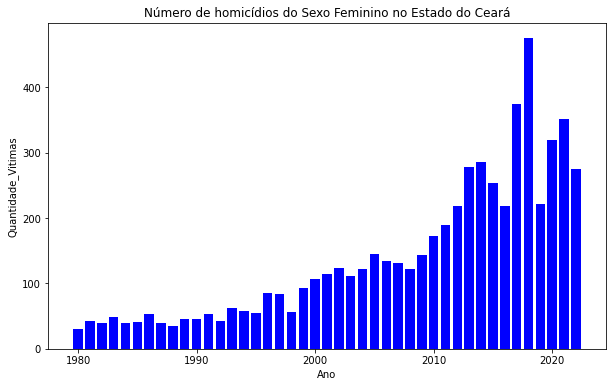

In [0]:

import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 6))
plt.bar(df_ceara['Ano'], df_ceara['Quantidade_vitimas'], color='blue')

# Rotulos
plt.xlabel('Ano')
plt.ylabel('Quantidade_Vitimas')
plt.title('Número de homicídios do Sexo Feminino no Estado do Ceará')

plt.show()

In [0]:
descricao = df_ceara.describe().reset_index()

In [0]:
descricao

,index,Ano,Quantidade_vitimas
0,count,43.000000,43.000000
1,mean,2001.000000,138.023256
2,std,12.556539,109.139380
3,min,1980.000000,31.000000
4,25%,1990.500000,50.500000
5,50%,2001.000000,111.000000
6,75%,2011.500000,203.500000
7,max,2022.000000,475.000000
